In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

main_data = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col='Country/Region')

In [140]:
main_data.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4


In [200]:
def fit_(data, grid, country, flag='linear'):
    plt.figure(figsize=(12,6))
    
    #make title and label axis
    title = str()
    ylab = str()
    xlab = 'Номер дня'
    if flag == 'linear':
        title = f'Зависимость количества заболевших в {country} от времени'
        ylab = 'Количество заболевших'
    if flag == 'log':
        title = f'Зависимость логарифма количества заболевших в {country} от времени'
        ylab = '$\ln$(Количество заболевших)'
    
    plt.plot(
        grid,
        data,
        'bo'
    )
    
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title, fontsize=15)
    plt.grid()
    plt.show()

In [204]:
def plot_model(log_data, new_grid, country):
    plt.figure(figsize=(12,6))

    #plot points
    plt.plot(
        new_grid,
        log_data,
        'bo'
    )

    f_cash = np.polyfit(new_grid, log_data, 1)
    f = sp.poly1d(f_cash)
    print('Параметры линейной зависимости:')
    print(f)

    plt.plot(
        new_grid,
        f(new_grid)
    )
    
    
    title = f'Зависимость логарифма количества заболевших в {country} от времени'
    ylab = '$\ln$(Количество заболевших)'
    xlab = 'Номер дня'
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title, fontsize=15)
    plt.grid()
    plt.show()

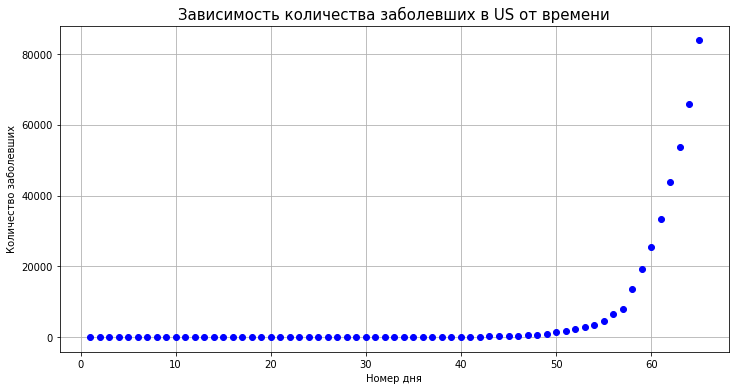

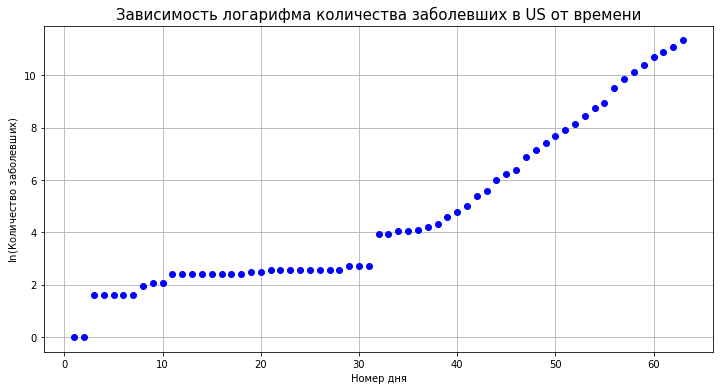

Параметры линейной зависимости:
 
0.2749 x + 3.07


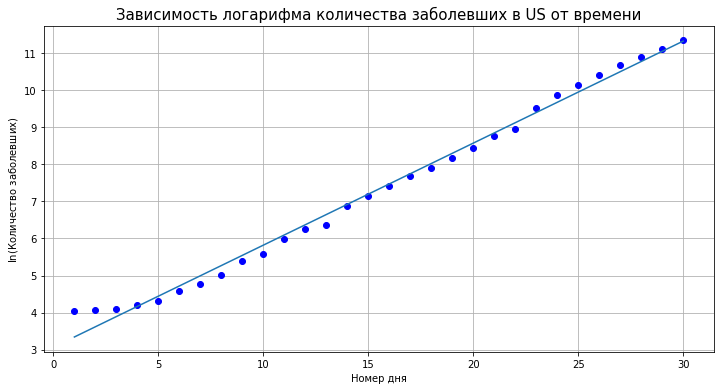

In [205]:
#prepare dataset
data_ = np.array(main_data.loc['US'])[3::]
grid = np.arange(1, data_.size + 1, 1)
fit_(data_, grid, 'US')

#prepare dataset
data_ = data_[data_ != 0]
data_ = data_[data_ != 2]

#make log scale
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
fit_(log_data, new_grid, 'US', flag='log')


log_data = log_data[log_data > 4]
new_grid = np.arange(1, log_data.size + 1, 1)

plot_model(log_data, new_grid, 'US')

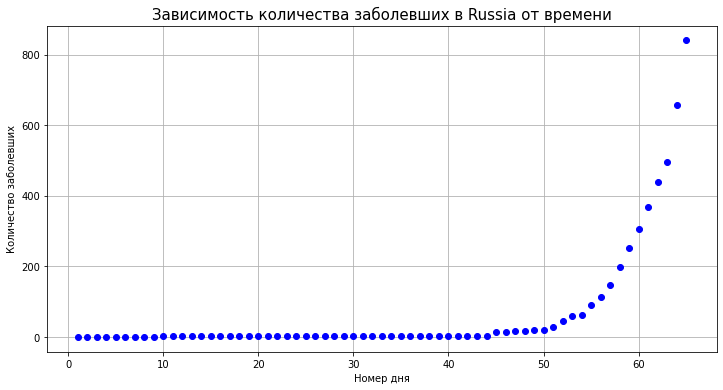

Параметры линейной зависимости:
 
0.2411 x + 0.8264


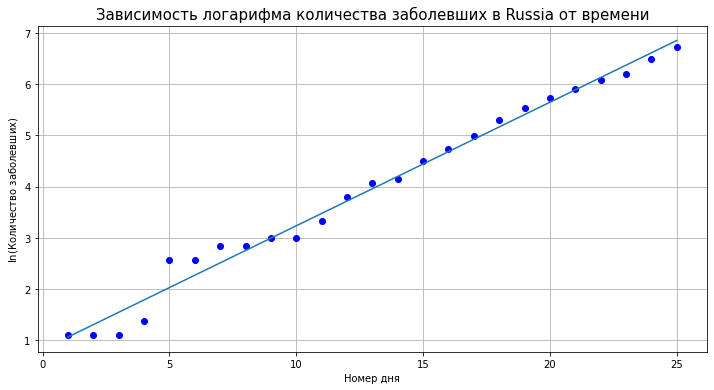

In [206]:
#prepare dataset
data_ = np.array(main_data.loc['Russia'])[3::]
grid = np.arange(1, data_.size + 1, 1)
fit_(data_, grid, 'Russia')

#prepare dataset
data_ = data_[data_ != 0]
data_ = data_[data_ != 2]

#make log scale
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

plot_model(log_data, new_grid, 'Russia')

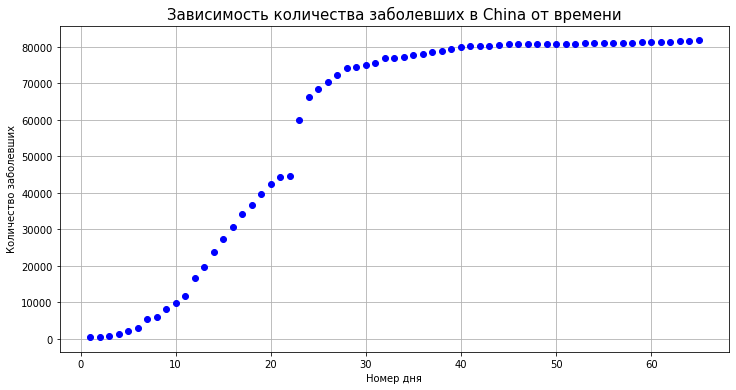

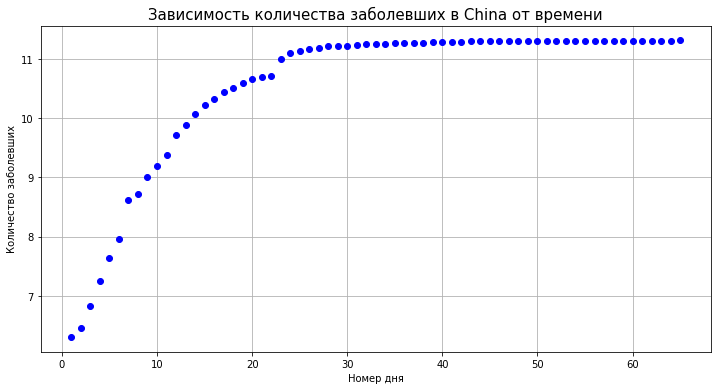

Параметры линейной зависимости:
 
0.3149 x + 6.024


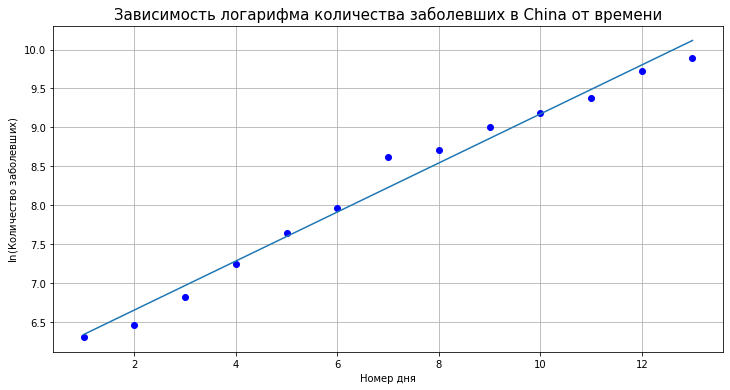

In [207]:
#prepare dataset
data_ = np.array(main_data.loc['China'])[...,3:].sum(axis=0)
grid = np.arange(1, data_.size + 1, 1)
fit_(data_, grid, 'China')

#make log scale
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
fit_(log_data, new_grid, 'China')

log_data = log_data[log_data < 10]
new_grid = np.arange(1, log_data.size + 1, 1)

plot_model(log_data, new_grid, 'China')

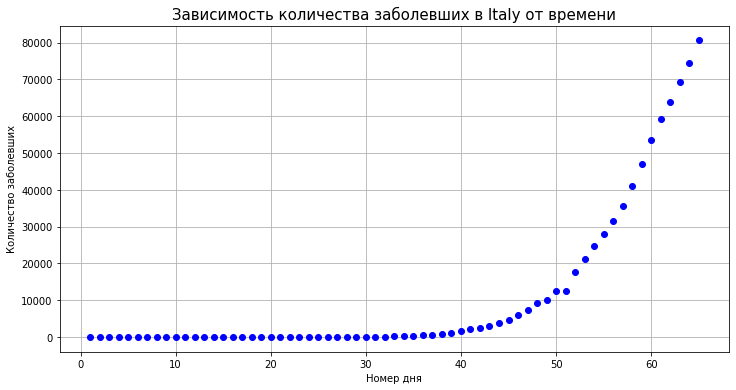

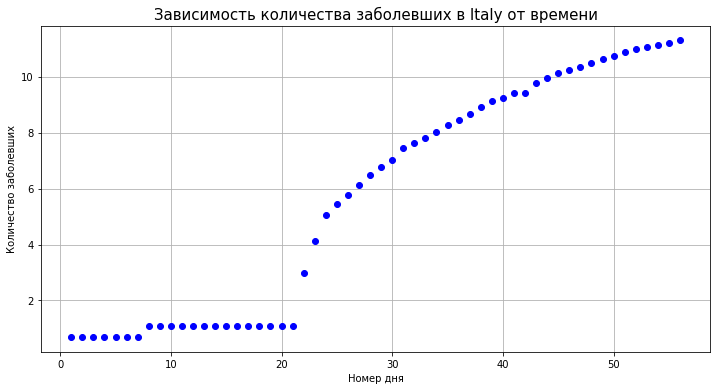

Параметры линейной зависимости:
 
0.2164 x + 6.198


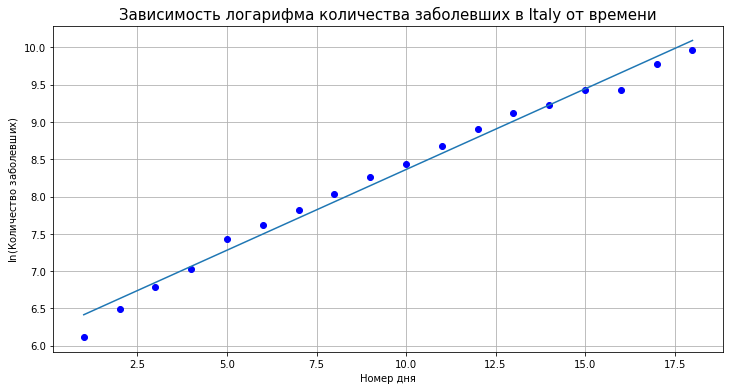

In [208]:
#prepare dataset
data_ = np.array(main_data.loc['Italy'])[3::]
grid = np.arange(1, data_.size + 1, 1)
fit_(data_, grid, 'Italy')

#make log scale
data_ = data_[data_ != 0]
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
fit_(log_data, new_grid, 'Italy')

log_data = log_data[log_data > 6]
log_data = log_data[log_data < 10]
new_grid = np.arange(1, log_data.size + 1, 1)

plot_model(log_data, new_grid, 'Italy')